## Preprocessing

### Load all climate data (Precip & Soil Moisture) station F102 - F108

In [ ]:
%run -i function_.py

current_directory = os.getcwd()
path_to_save = current_directory+r'/Regression'
os.makedirs(path_to_save, exist_ok=True)


In [ ]:
df_station = pd.read_excel(os.getcwd()+"/Inputs/Physiography Data.xlsx",
                           engine="openpyxl", sheet_name=None, skiprows=1,)

# Print the name of each sheets


5 Stations with different soil profiles and slope.


### Load all the precipitation in the stations

In [ ]:
station_name = list(df_station.keys())[:5]
station_name


['F102', 'F106', 'F107', 'F108', 'F110']

### Precipitation of all the stations

In [ ]:
precipitation = df_station['F102'].iloc[:, :2].set_index('Date')

for i in station_name:
    precipitation = precipitation.merge(df_station[i].iloc[:, :2].set_index(
        'Date').rename(columns={'mm': i}), left_index=True, right_index=True)
precipitation = precipitation.drop(columns='mm')

precipitation = precipitation.replace([-996,-999], np.nan)
precipitation.describe()

F102         F106         F107         F108         F110
count  5616.000000  5648.000000  3981.000000  5661.000000  5642.000000
mean      2.125741     2.066737     2.039206     2.019604     2.144523
std       7.847348     7.646972     7.632055     7.489740     8.103167
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000     0.000000     0.000000
max     142.750000   171.450000   170.940000   160.270000   171.450000

In [5]:
# Load the excel
data = pd.read_excel(os.getcwd()+"/Inputs/Physiography Data.xlsx",
                     engine="openpyxl", sheet_name=None, )
data.keys()


dict_keys(['F102', 'F106', 'F107', 'F108', 'F110', 'MESONET HINT_TEMP', 'Discharge', 'Soils_Slopes'])

<AxesSubplot:ylabel='Date'>

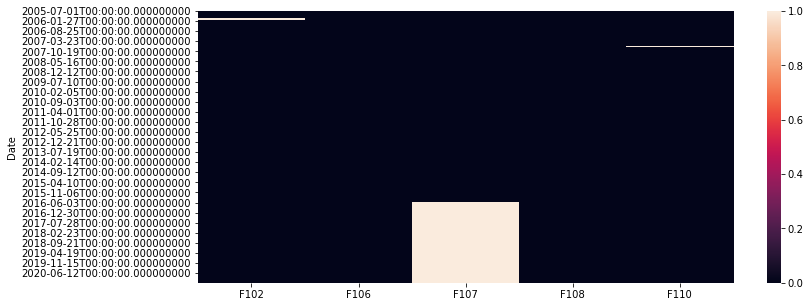

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(precipitation.isna())


Micronet Stations  Slope %       Texture  No. Layers  Max Depth (mm)
0              f102      5.9  LFS-FSL-SL-L           4            1829
1              f106      5.5      FSL-SICL           2            1727
2              f107      0.5      FSL-SICL           2            1727
3              f108      3.7      FSL-SICL           2            1727
4              f110      2.8      FSL-SICL           2            1727

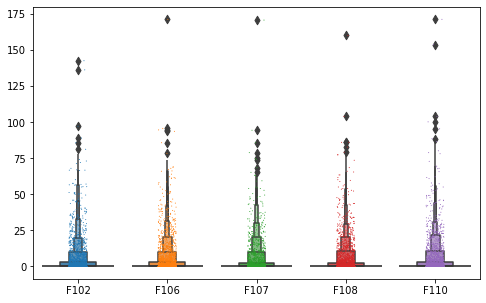

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
sns.stripplot(data=precipitation, size= 1)
sns.boxenplot(data=precipitation)
data['Soils_Slopes']


<AxesSubplot:xlabel='Date'>

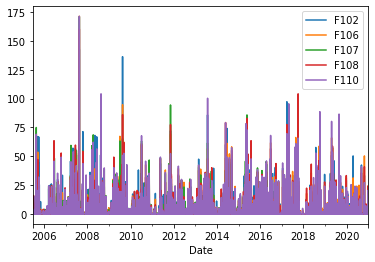

In [8]:
precipitation.plot()

In [9]:
precipitation.describe()

F102         F106         F107         F108         F110
count  5616.000000  5648.000000  3981.000000  5661.000000  5642.000000
mean      2.125741     2.066737     2.039206     2.019604     2.144523
std       7.847348     7.646972     7.632055     7.489740     8.103167
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000     0.000000     0.000000
max     142.750000   171.450000   170.940000   160.270000   171.450000

Stations with the least missing precipitaion values are preferred for analysis listed below in descending order
- F106
- F110
- F102
- F107

Check the correlation between the precipitation at the different station 

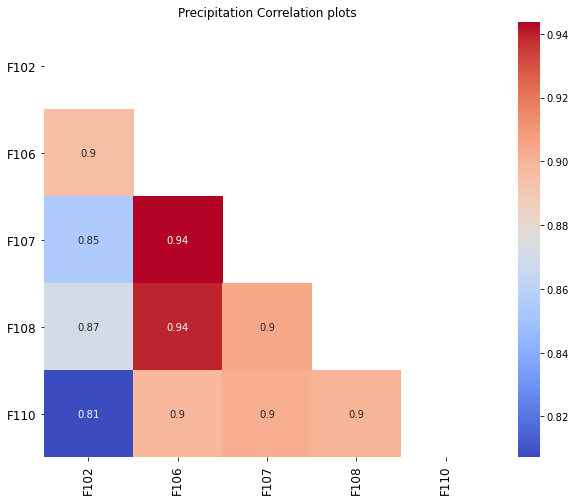

In [10]:
corr_plot(precipitation, 'Precipitation Correlation plots')


We choose the station with the most complete precipitation "F108".
<mark>F108</mark> has a high correlation with <mark>F106</mark> station that happens to be the next complete.
They both have the same soil property but different slopes


In [11]:
data["Soils_Slopes"]


Micronet Stations  Slope %       Texture  No. Layers  Max Depth (mm)
0              f102      5.9  LFS-FSL-SL-L           4            1829
1              f106      5.5      FSL-SICL           2            1727
2              f107      0.5      FSL-SICL           2            1727
3              f108      3.7      FSL-SICL           2            1727
4              f110      2.8      FSL-SICL           2            1727

### Load the Temperature data

We have a single temperature data for all the stations located in sheetnamae <mark> MESONET HINT_TEMP</mark>

In [12]:
# Obtain the Mesonet Temperature Min and Max temperature
Temperature = data["MESONET HINT_TEMP"].set_index('Date')
#Temperature.rename(columns={"TMAX (C)" : "TMAX ", 'TMIN (C)': "TMAX"})

# Merge the temperature and precipitation for the F108 station
df_F106 = Temperature.merge(precipitation['F106'], how='inner', on='Date')
df_F106 = df_F106.rename(columns={'F106': "PRCP (mm)"})


In [13]:
df_F106["CMS"] = data["Discharge"].set_index('Date').loc['2005-07-01':]

In [14]:
status(df_F106)

Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5663              0         0.0%
TMIN (C)         5663              0         0.0%
PRCP (mm)        5663             15         0.3%
CMS              5663              0         0.0%


In [15]:
# replace all odd values due to instrument reading and linear interpolate
df_F106 = df_F106.replace(-571.105400, np.nan)
df_F106 = df_F106.interpolate(method='linear', limit_direction='both')
status(df_F106)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5663              0         0.0%
TMIN (C)         5663              0         0.0%
PRCP (mm)        5663              0         0.0%
CMS              5663              0         0.0%


### Merge the soil properties, temperature and precipitation 

In [16]:
df_F106 = df_F106.merge(df_station['F108'].drop(columns='mm'),
                        how='inner', on='Date')

# set the date as the index of the dataframe
df_F106 = df_F106.set_index('Date')

# Rename the soil columns
df_F106 = df_F106.rename(columns={"5 cm": "SM 5 (cm)",
                                  "25 cm": "SM 25 (cm)",
                                  "45 cm": "SM 45 (cm)"})


### Deal with the missing values.

In [17]:
# replace all the -998  adn -996 with np.nan
df_F106 = df_F106.replace([-998, -996], np.nan)

status(df_F106)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5663              0         0.0%
TMIN (C)         5663              0         0.0%
PRCP (mm)        5663              0         0.0%
CMS              5663              0         0.0%
SM 5 (cm)        5663             88         1.6%
SM 25 (cm)       5663             88         1.6%
SM 45 (cm)       5663             88         1.6%


<AxesSubplot:ylabel='Date'>

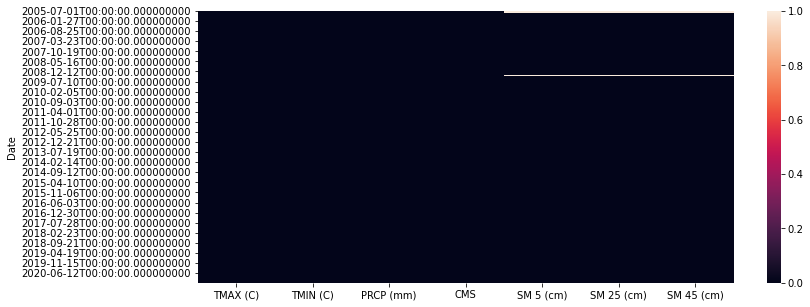

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df_F106.isna())

In [19]:
display_side_by_side([sequence_of_missing_values(df_F106, 'SM 5 (cm)'),
                     sequence_of_missing_values(df_F106, 'SM 25 (cm)'), sequence_of_missing_values(df_F106, 'SM 45 (cm)')],
                     ['5cm', '25cm', '45cm']
                     )


Drop the first 56 rows till 2005-08-26 and linear interpolate the dataframe

In [20]:
df_F106 = df_F106.loc['2005-08-26':].interpolate(
    method='linear', limit_direction='both')
status(df_F106)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5607              0         0.0%
TMIN (C)         5607              0         0.0%
PRCP (mm)        5607              0         0.0%
CMS              5607              0         0.0%
SM 5 (cm)        5607              0         0.0%
SM 25 (cm)       5607              0         0.0%
SM 45 (cm)       5607              0         0.0%


## F106 suggested Correction 

In [21]:
# 1-- Remove data prior to Dec-2006, as SM-45 sensor does not seem to work correctly

condition = df_F106.index > '2006-12-01'
df_F106 = df_F106.loc[condition]

# 2-- no idea why SM-25 is so high between 2011-07 and 2011-08 when there was very little Precip and also very little
#     soil moisture in the top 5-25 cm (SM-25).


# 3-- spike in SM-5  2015-07 inaccurate
condition = (df_F106.index > '2015-06-01') & (df_F106.index < '2015-07-31') & \
            (df_F106[df_F106.columns[6]] > 1.0)
print(df_F106.loc[condition, 'SM 5 (cm)'])   # SM cannot exceed 1.0

# replace it with NaN, and then fill-in by interpolation
df_F106.loc[condition, 'SM 5 (cm)'] = np.NaN
df_F106['SM 5 (cm)'].interpolate(method='linear',
                                 limit_direction='both', inplace=True)
#status(df_F106)


# 4-- spike in SM-25 2019-08 inaccurate
condition = (df_F106.index > '2019-08-01') & (df_F106.index < '2019-09-30') & \
            (df_F106[df_F106.columns[6]] > 1.0)
print(df_F106.loc[condition, 'SM 25 (cm)'])   # SM cannot exceed 1.0

# replace it with NaN, and then fill-in by interpolation
df_F106.loc[condition, 'SM 25 (cm)'] = np.NaN
df_F106['SM 25 (cm)'].interpolate(method='linear',
                                  limit_direction='both', inplace=True)
#status(df_F106)


Series([], Name: SM 5 (cm), dtype: float64)
Series([], Name: SM 25 (cm), dtype: float64)


## Feature Engineering

- create median and mean precipitations weekly and yearly frequency. 
- check the correlation between features on both time format.
- load the yearly yeild
- Split the data into train and test
- Create the pipeline no tuning yet
-- XGBoost
-- Catboost
-- Random Forest
-- ExtraTree

### Correlation plots

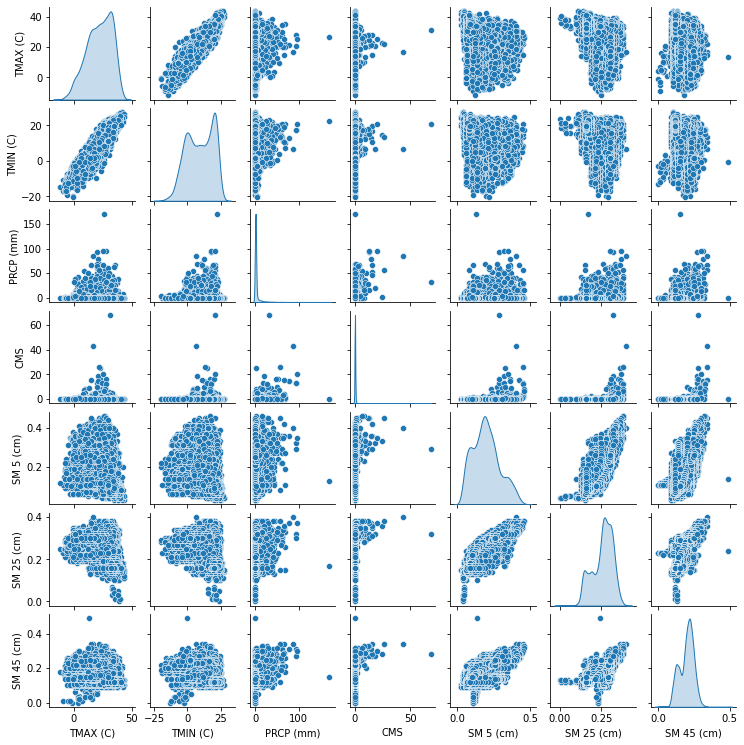

In [22]:
sns.pairplot(df_F106, diag_kind='kde', height=1.5)


### Correlation on daily data

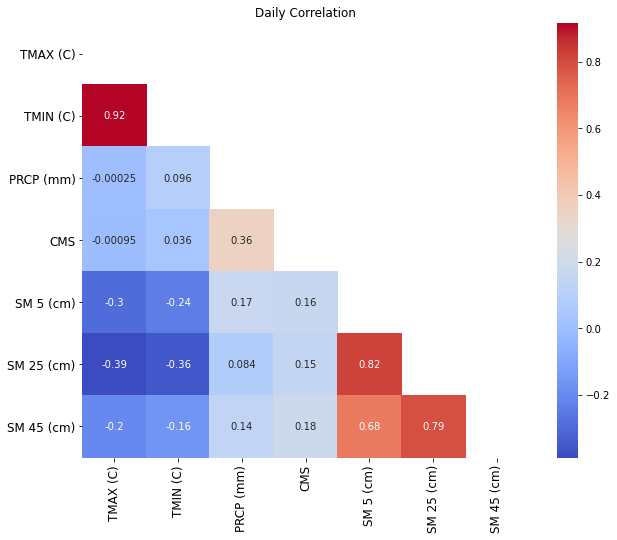

In [23]:
corr_plot(df_F106, 'Daily Correlation')

## Daily Analysis

In [24]:
df_AI = df_F106.copy()


df_AI = df_AI.rename(columns={"PRCP (mm)": "$P [mm]$",
                              "TMAX (C)": "$T_{max}$ [$^oC$]",
                              "TMIN (C)": '$T_{min}$ [$^oC$]',
                              "SM 5 (cm)": "$SM_{5} [cm]$",
                              "SM 25 (cm)": "$SM_{25} [cm]$",
                              "SM 45 (cm)": "$SM_{45} [cm]$",
                              "CMS": "$Dis [CMS]$"})

df_AI['Month'] = df_AI.index.month
# Precipitation Lags
#df_AI['$P^{lag1} [mm]$'] = df_AI["$P [mm]$"].shift(1)
#df_AI['$P^{lag2} [mm]$'] = df_AI["$P [mm]$"].shift(2)

# Sort the columns
month = df_AI.loc[:, df_AI.columns.str.startswith('M')]
prcp = df_AI.loc[:, df_AI.columns.str.startswith('$P')]
temp = df_AI.loc[:, df_AI.columns.str.startswith('$T')]
ds = df_AI.loc[:, df_AI.columns.str.startswith('$D')]
sm = df_AI.loc[:, df_AI.columns.str.startswith('$S')]



Features = list(df_AI.drop(columns= list(sm.columns)).columns)

df_AI = month.merge(temp, on='Date').merge(prcp, on='Date').merge(
    ds, on="Date").merge(sm, on="Date").dropna()

### Daily SM_5

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.92   | 0.0 |
|   XGBoost    |   0.87   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.9    | 0.03 |
|   XGBoost    |   0.93   | 0.02 |
|  ExtraTree   |   0.9    | 0.03 |
+--------------+----------+------+


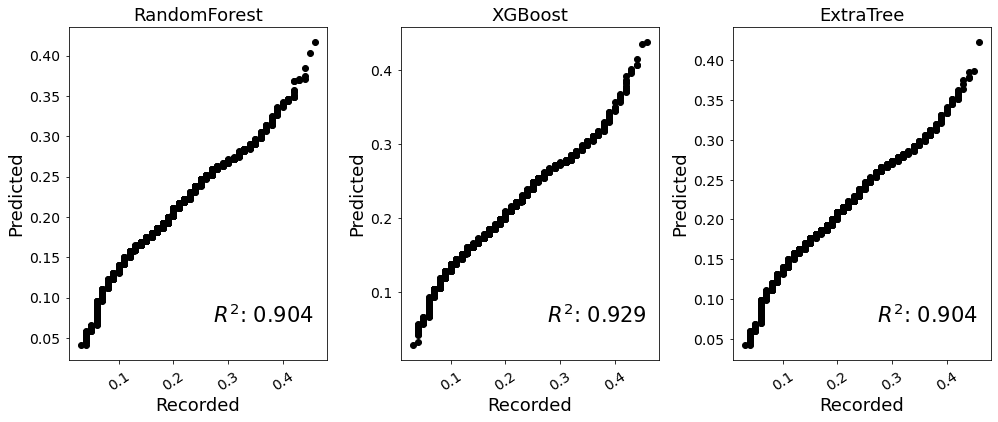

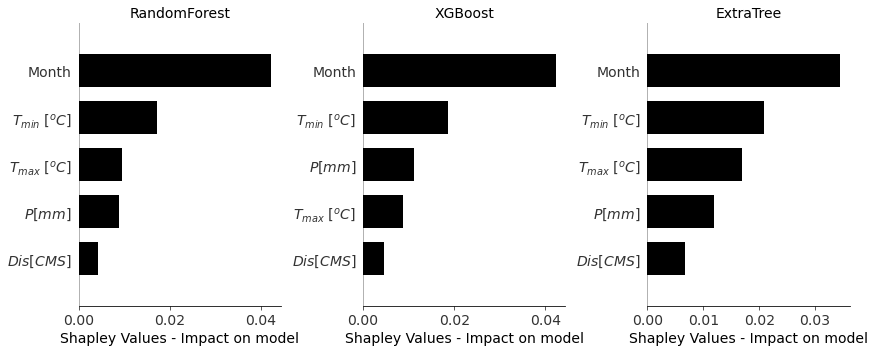

In [25]:
X = df_AI.iloc[:, :5].values
y = df_AI.iloc[:, 5].values  # SM 5cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3,)


pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "daily_SM5"

feature_importance(path_to_save, Soil, pipeliner, X, y)


### Daily SM_25

In [26]:
X = df_AI.iloc[:,:5].values
y = df_AI.iloc[:,6].values  # SM 25cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)

print_results(holdem, y_test)


Soil = "daily_SM25"

feature_importance(path_to_save, Soil, pipeliner, X, y)


+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.94   | 0.0 |
|   XGBoost    |   0.91   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.94   | 0.02 |
|   XGBoost    |   0.95   | 0.01 |
|  ExtraTree   |   0.94   | 0.01 |
+--------------+----------+------+


### Daily SM_45

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.94   | 0.0 |
|   XGBoost    |   0.9    | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.93   | 0.01 |
|   XGBoost    |   0.94   | 0.01 |
|  ExtraTree   |   0.93   | 0.01 |
+--------------+----------+------+


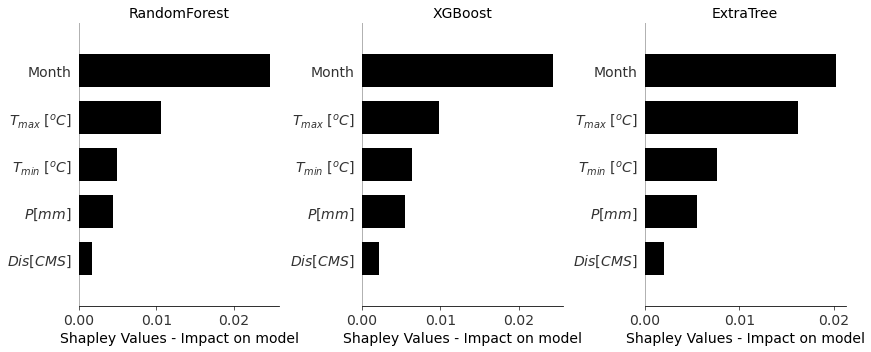

In [27]:
X = df_AI.iloc[:, :5].values
y = df_AI.iloc[:, 7].values  # SM 5cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "daily_SM45"

feature_importance(path_to_save, Soil, pipeliner, X, y)


Lags were ommited on the daily scale 

## 3 Days Rolling average

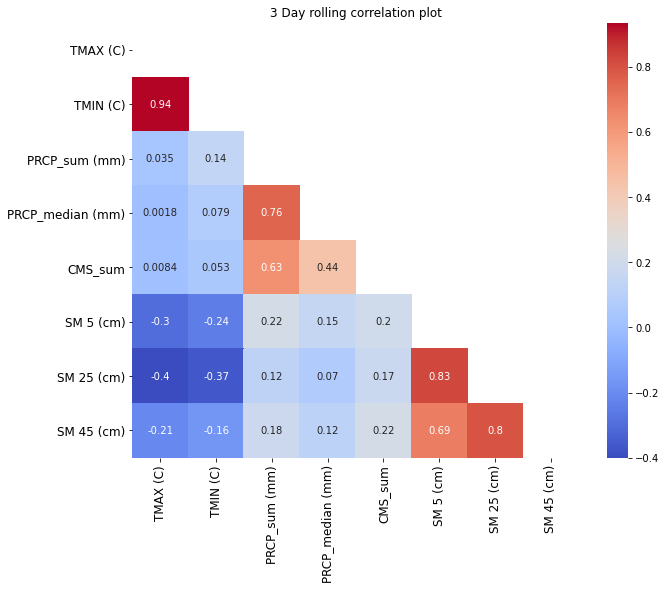

In [29]:
# Resample the temperature
resampled = df_F106[['TMAX (C)', "TMIN (C)"]].resample('3D').median()
# Resample the Precipitation sum and median
resampled["PRCP_sum (mm)"] = df_F106["PRCP (mm)"].resample('3D').sum()
resampled["PRCP_median (mm)"] = df_F106["PRCP (mm)"].resample('3D').median()
# Resample the discharge sum
resampled["CMS_sum"] = df_F106["CMS"].resample('3D').sum()
# Resample the SM
resampled_SM = df_F106.iloc[:, 4:].resample('3D').mean()
# The transformed precipitation mean and median

df_F106_resampled = resampled.merge(resampled_SM, on='Date', how="inner")


corr_plot(df_F106_resampled, '3 Day rolling correlation plot')

In [30]:
df_AI = df_F106_resampled.drop(columns=["PRCP_median (mm)"])

df_AI = df_AI.rename(columns={"PRCP_sum (mm)": "$P [mm]$",
                              "TMAX (C)": "$T_{max}$ [$^oC$]",
                              "TMIN (C)": '$T_{min}$ [$^oC$]',
                              "SM 5 (cm)": "$SM_{5} [cm]$",
                              "SM 25 (cm)": "$SM_{25} [cm]$",
                              "SM 45 (cm)": "$SM_{45} [cm]$",
                              "CMS_sum": "$Dis [CMS]$"})

#corr_plot(df_AI, 'DF_AI correlation plot')

# Precipitation Lags
df_AI['$P^{lag1} [mm]$'] = df_AI["$P [mm]$"].shift(1)
df_AI['$P^{lag2} [mm]$'] = df_AI["$P [mm]$"].shift(2)


# Stack the columns
month = df_AI.loc[:, df_AI.columns.str.startswith('M')]
prcp = df_AI.loc[:, df_AI.columns.str.startswith('$P')]
temp = df_AI.loc[:, df_AI.columns.str.startswith('$T')]
ds = df_AI.loc[:, df_AI.columns.str.startswith('$D')]
sm = df_AI.loc[:, df_AI.columns.str.startswith('$S')]


Features = list(df_AI.drop(columns=list(sm.columns)).columns)

# Merge the dataframe
df_AI = month.merge(temp, on='Date').merge(prcp, on='Date').merge(
    ds, on="Date").merge(sm, on="Date").dropna()


#df_AI


### SM_5

In [31]:
X = df_AI.iloc[:, :6].values
y = df_AI.iloc[:, 6].values  # SM 5cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "3d_SM5"

feature_importance(path_to_save, Soil, pipeliner, X, y, )


+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.92   | 0.0 |
|   XGBoost    |   0.98   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.9    | 0.03 |
|   XGBoost    |   0.96   | 0.02 |
|  ExtraTree   |   0.9    | 0.03 |
+--------------+----------+------+


### SM_25

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.93   | 0.0 |
|   XGBoost    |   0.99   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.92   | 0.02 |
|   XGBoost    |   0.94   | 0.01 |
|  ExtraTree   |   0.89   | 0.02 |
+--------------+----------+------+


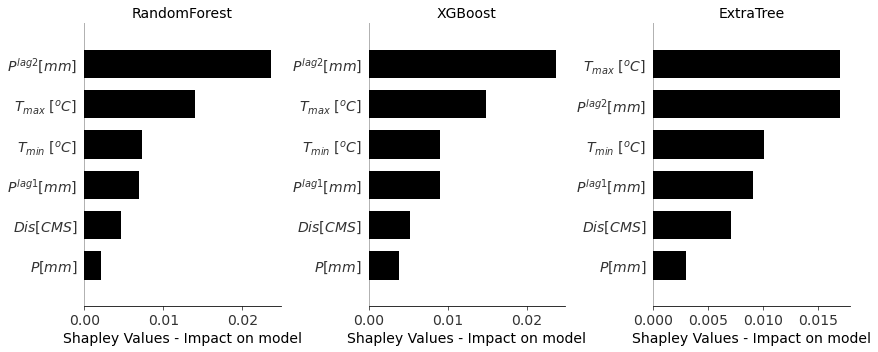

In [32]:
X = df_AI.iloc[:, :6].values
y = df_AI.iloc[:, 7].values  # SM 5cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)




Soil = "3d_SM25"

feature_importance(path_to_save, Soil, pipeliner, X, y)


### SM_45

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.92   | 0.0 |
|   XGBoost    |   0.98   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.93   | 0.01 |
|   XGBoost    |   0.94   | 0.01 |
|  ExtraTree   |   0.91   | 0.01 |
+--------------+----------+------+


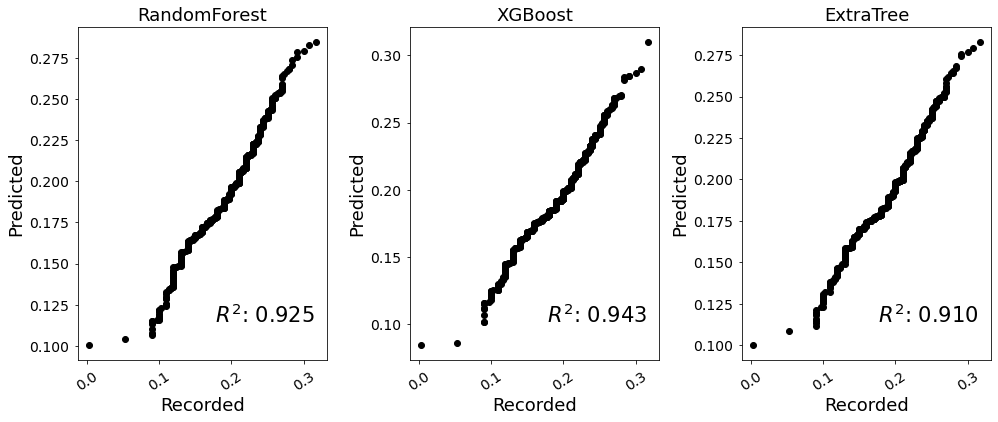

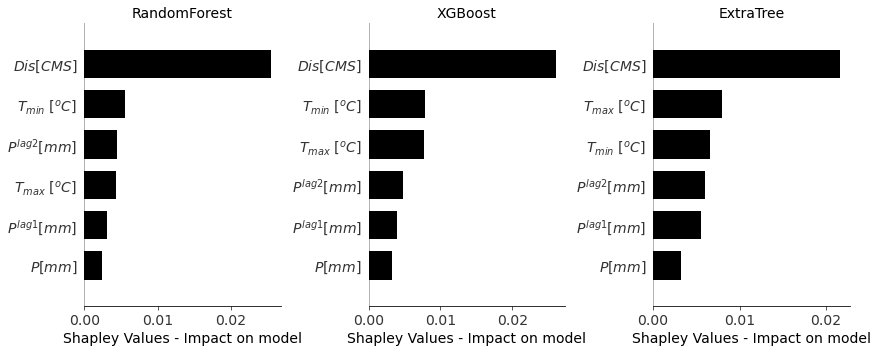

In [33]:
X = df_AI[Features].values
y = df_AI.iloc[:, 8].values  # SM 45cm


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.3)


pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "3d_SM45"

feature_importance(path_to_save, Soil, pipeliner,X ,y,)


## Weekly

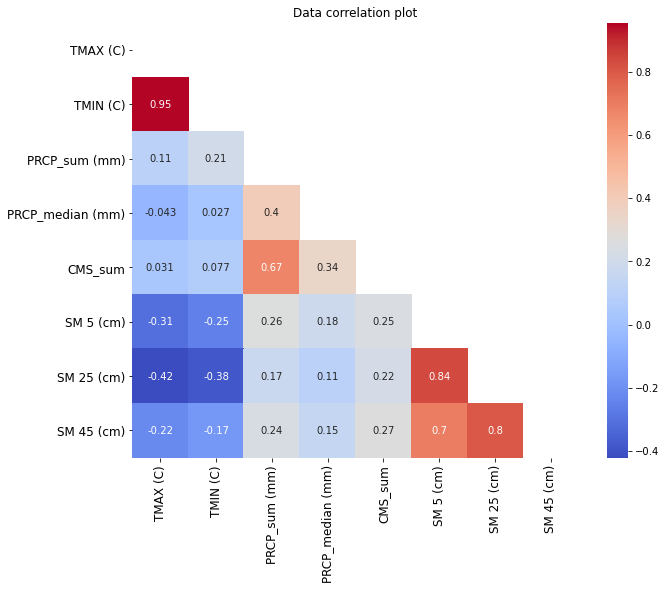

In [34]:
# Resample the temperature
resampled = df_F106[['TMAX (C)', "TMIN (C)"]].resample('W').median()
# Resample the Precipitation sum and median
resampled["PRCP_sum (mm)"] = df_F106["PRCP (mm)"].resample('W').sum()
resampled["PRCP_median (mm)"] = df_F106["PRCP (mm)"].resample('W').median()
# Resample the discharge sum
resampled["CMS_sum"] = df_F106["CMS"].resample('W').sum()
# Resample the SM
resampled_SM = df_F106.iloc[:, 4:].resample('W').mean()
# The transformed precipitation mean and median

df_F106_resampled = resampled.merge(resampled_SM, on='Date', how="inner")


corr_plot(df_F106_resampled, 'Data correlation plot')



The pearson correlation shows that the resampled weekly mean PRCP (mm) has a higher correlation with other features than the median

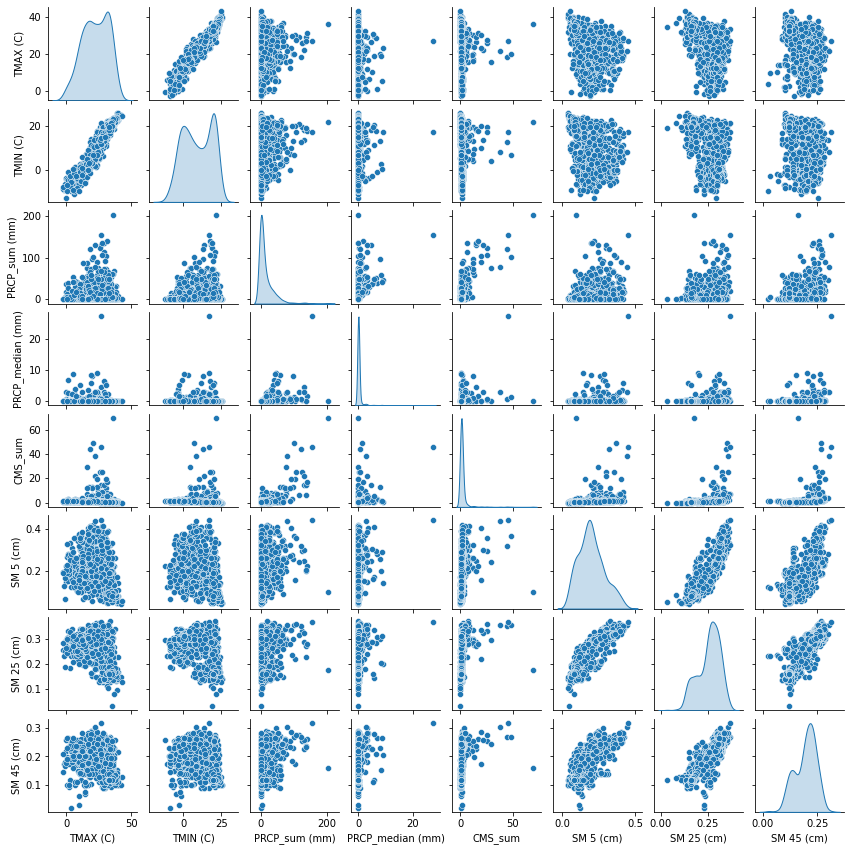

In [35]:
sns.pairplot(df_F106_resampled, diag_kind='kde', height=1.5)

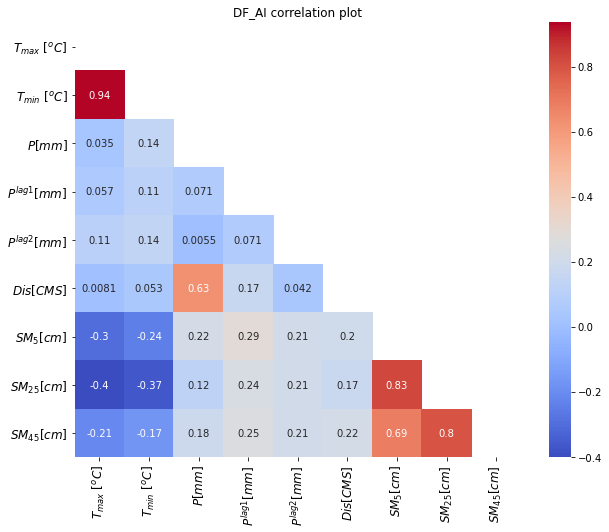

In [36]:
corr_plot(df_AI, 'DF_AI correlation plot')

In [37]:

# Create Precipitation Lags
df_AI['$P^{lag1} [mm]$'] = df_AI["$P [mm]$"].shift(1)
df_AI['$P^{lag2} [mm]$'] = df_AI["$P [mm]$"].shift(2)

# rearrange the columns
month = df_AI.loc[:, df_AI.columns.str.startswith('M')]
prcp = df_AI.loc[:, df_AI.columns.str.startswith('$P')]
temp = df_AI.loc[:, df_AI.columns.str.startswith('$T')]
ds = df_AI.loc[:, df_AI.columns.str.startswith('$D')]
sm = df_AI.loc[:, df_AI.columns.str.startswith('$S')]


Features = list(df_AI.drop(columns=list(sm.columns)).columns)


df_AI = month.merge(temp, on='Date').merge(prcp, on='Date').merge(
    ds, on="Date").merge(sm, on="Date").dropna()


### SM_5cm

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.93   | 0.0 |
|   XGBoost    |   0.99   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.9    | 0.03 |
|   XGBoost    |   0.94   | 0.02 |
|  ExtraTree   |   0.88   | 0.03 |
+--------------+----------+------+


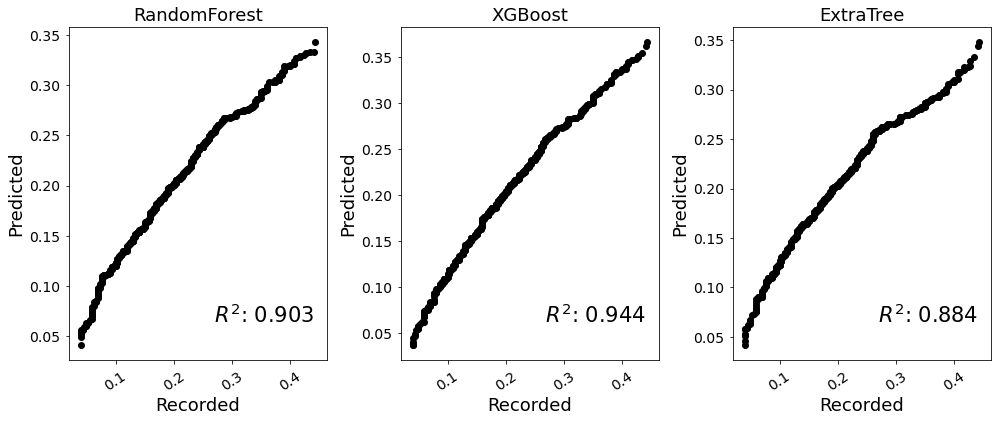

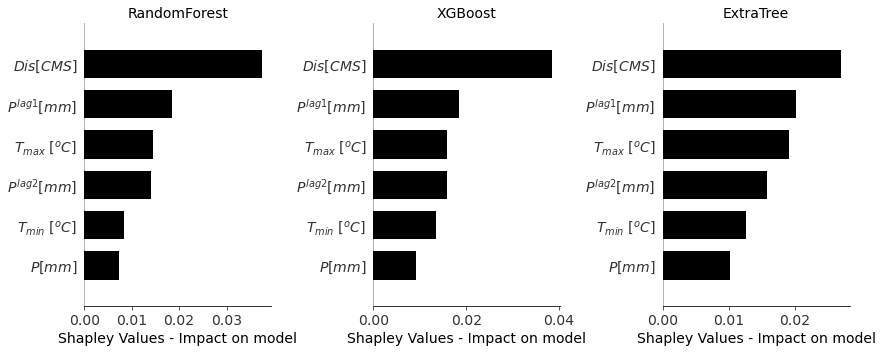

In [38]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -3].values # SM 5cm


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y.ravel(),
                                                    test_size=0.3,
                                                    )
                                                    
pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]

#model = pipeline_RF.fit(X_train, y_train)


holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "week_SM5"

feature_importance(path_to_save, Soil, pipeliner, X, y, )


 Randomforest gives the best results for the test result although performs the least on training 
 while the RMSE is equal for both the XGBoost and the Extratree

### SM_25cm

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.93   | 0.0 |
|   XGBoost    |   0.99   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.93   | 0.02 |
|   XGBoost    |   0.96   | 0.01 |
|  ExtraTree   |   0.92   | 0.02 |
+--------------+----------+------+


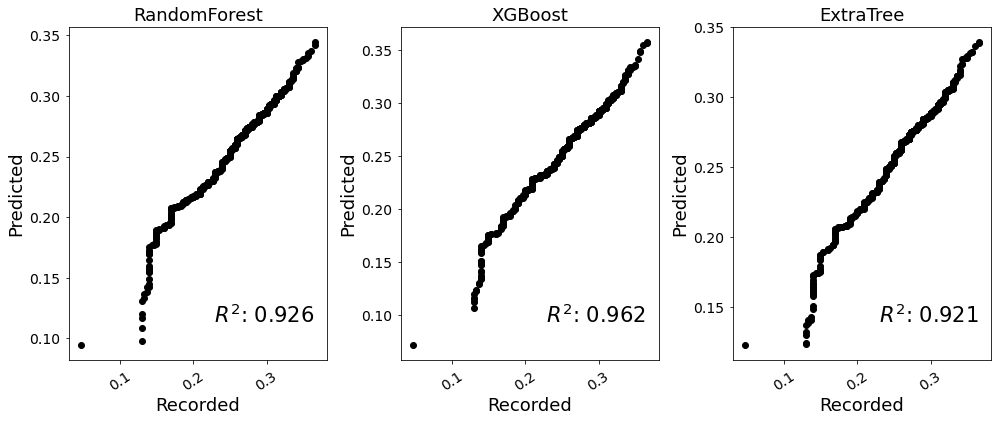

In [39]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -2].values # SM 25cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "week_SM25"

feature_importance(path_to_save, Soil, pipeliner, X, y, )


### SM_45cm

+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.93   | 0.0 |
|   XGBoost    |   0.98   | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.95   | 0.01 |
|   XGBoost    |   0.97   | 0.01 |
|  ExtraTree   |   0.94   | 0.01 |
+--------------+----------+------+


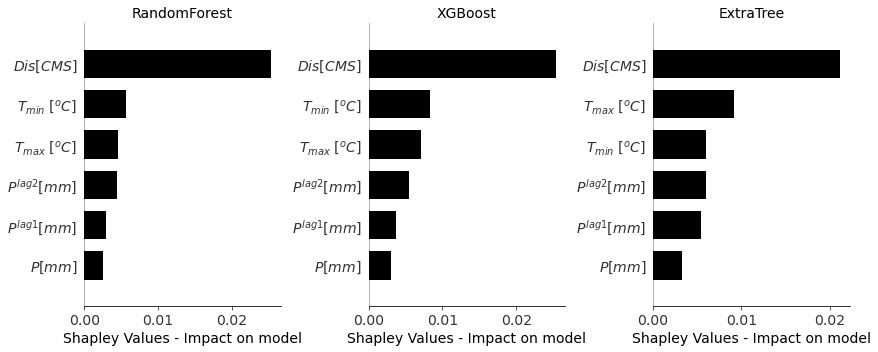

In [40]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -1].values # SM 45cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


#model = pipeline_RF.fit(X_train, y_train)


holdem = results(X_train, y_train, X_test, y_test, pipeliner)
print_results(holdem, y_test)


Soil = "week_SM45"

feature_importance(path_to_save, Soil, pipeliner, X, y, )


## Shapley Analysis

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(32, 5))
gs = gridspec.GridSpec(1, 3)
keep = {}
for count, model in enumerate(pipeliner):
    Modeled = model[0].fit(X, y.ravel())
    explainer = shap.TreeExplainer(Modeled)
    shap_values = explainer.shap_values(X)
    ax = fig.add_subplot(gs[0, count])
    shap.summary_plot(shap_values, X, Features, show=False,
                      plot_type="bar", color="black", plot_size=(12, 5))
    plt.xlabel('Shapley Values - Impact on model', fontsize=14)
    plt.tick_params(labelsize=14)
    # plt.ylabel(labelsize=16)
    plt.tight_layout(pad=1.2)
    plt.title(model.steps[0][0], fontsize=14)
    keep[model.steps[0][0]] = shap_values
    fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.savefig(path_to_save+r'/Histogram-importance.jpg',
            format='jpeg', dpi=300, bbox_inches='tight')
plt.show()


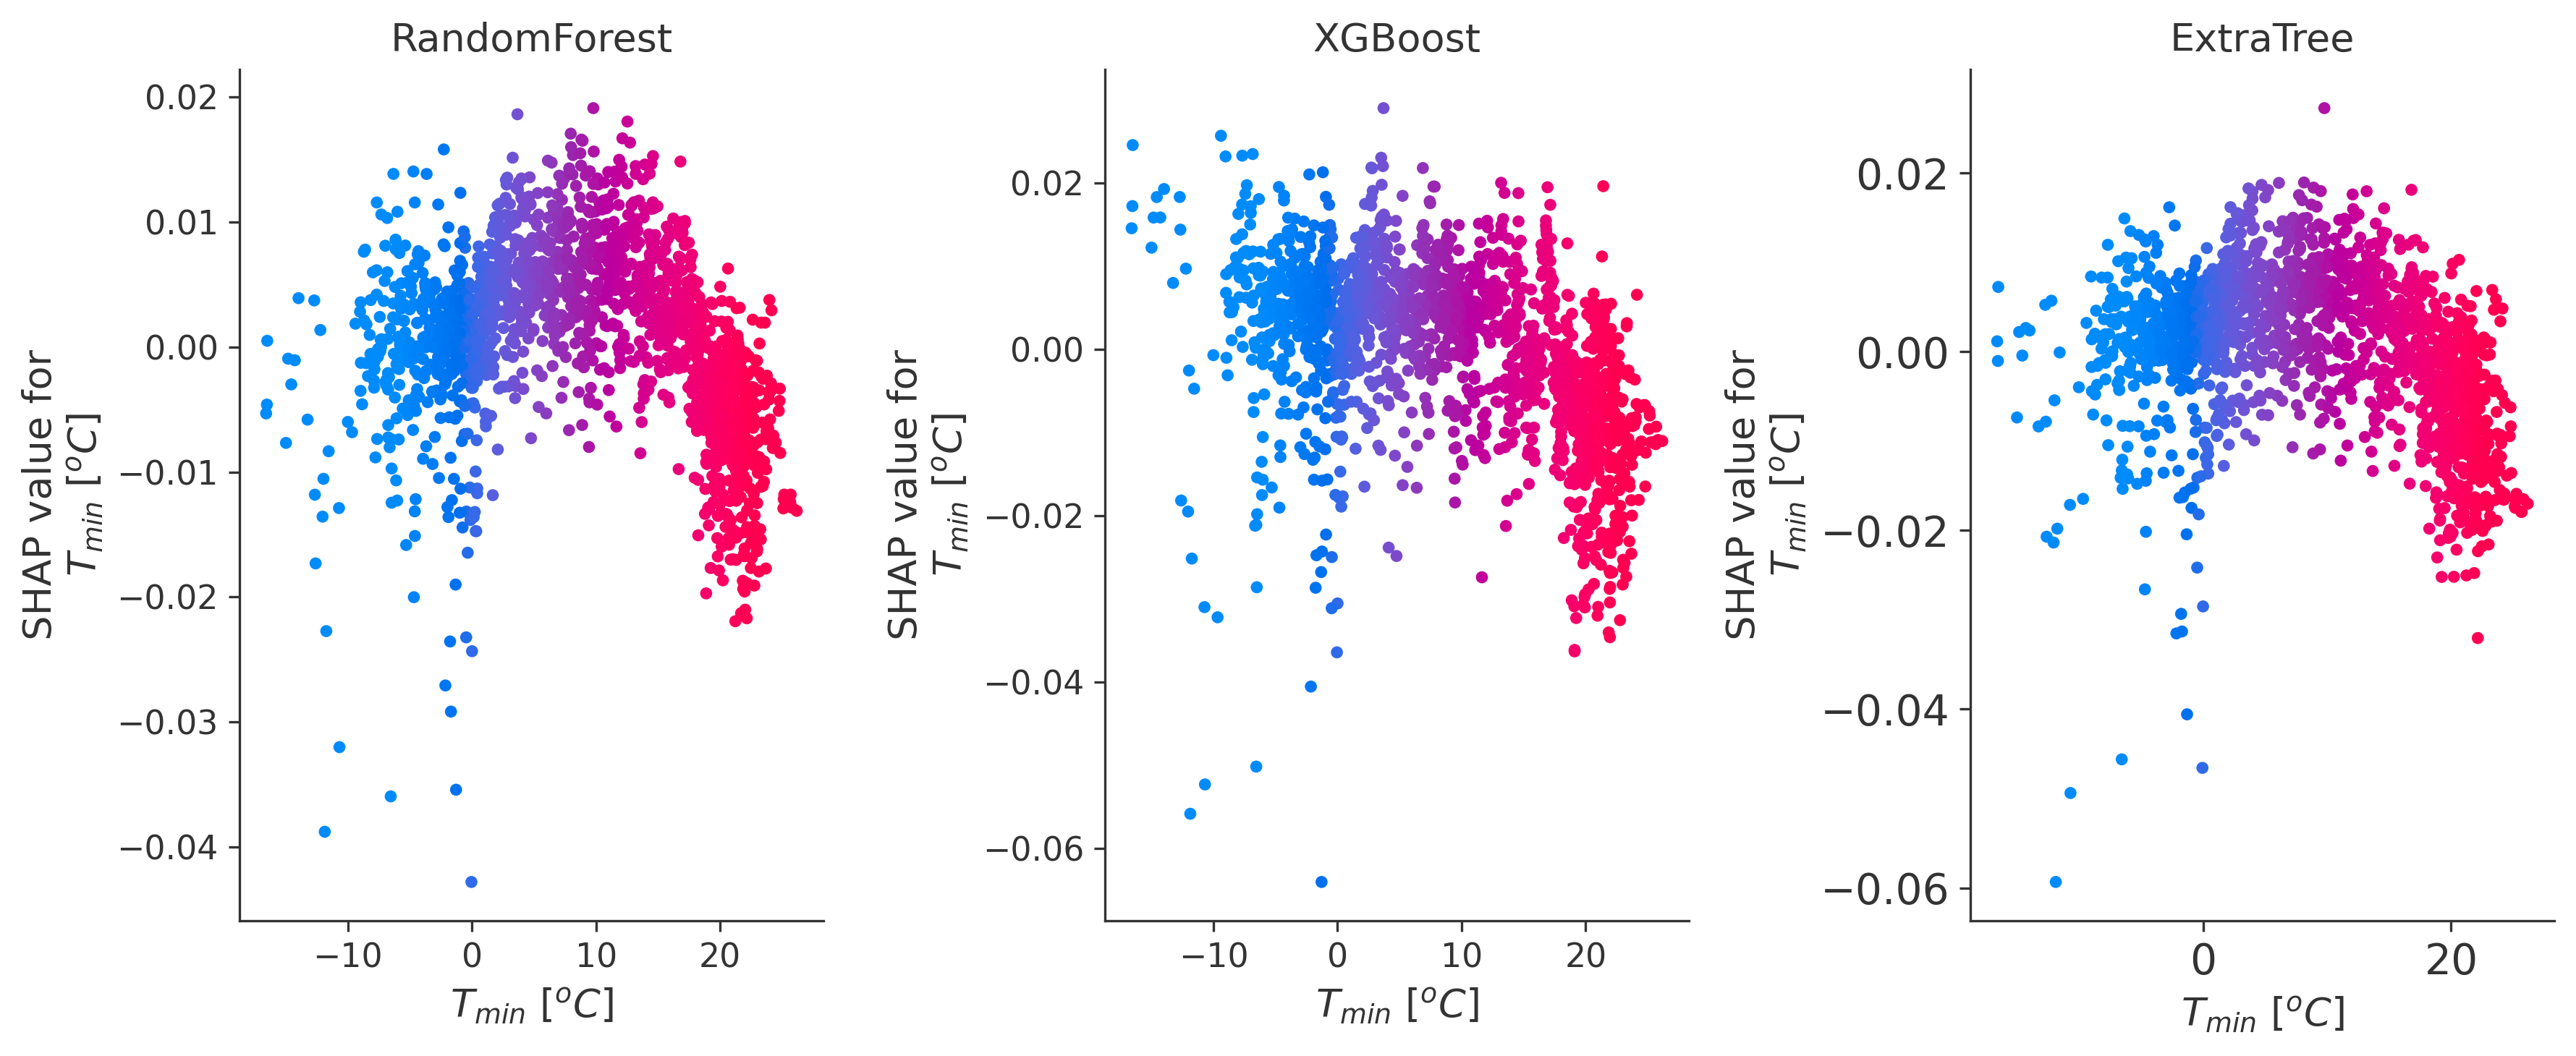

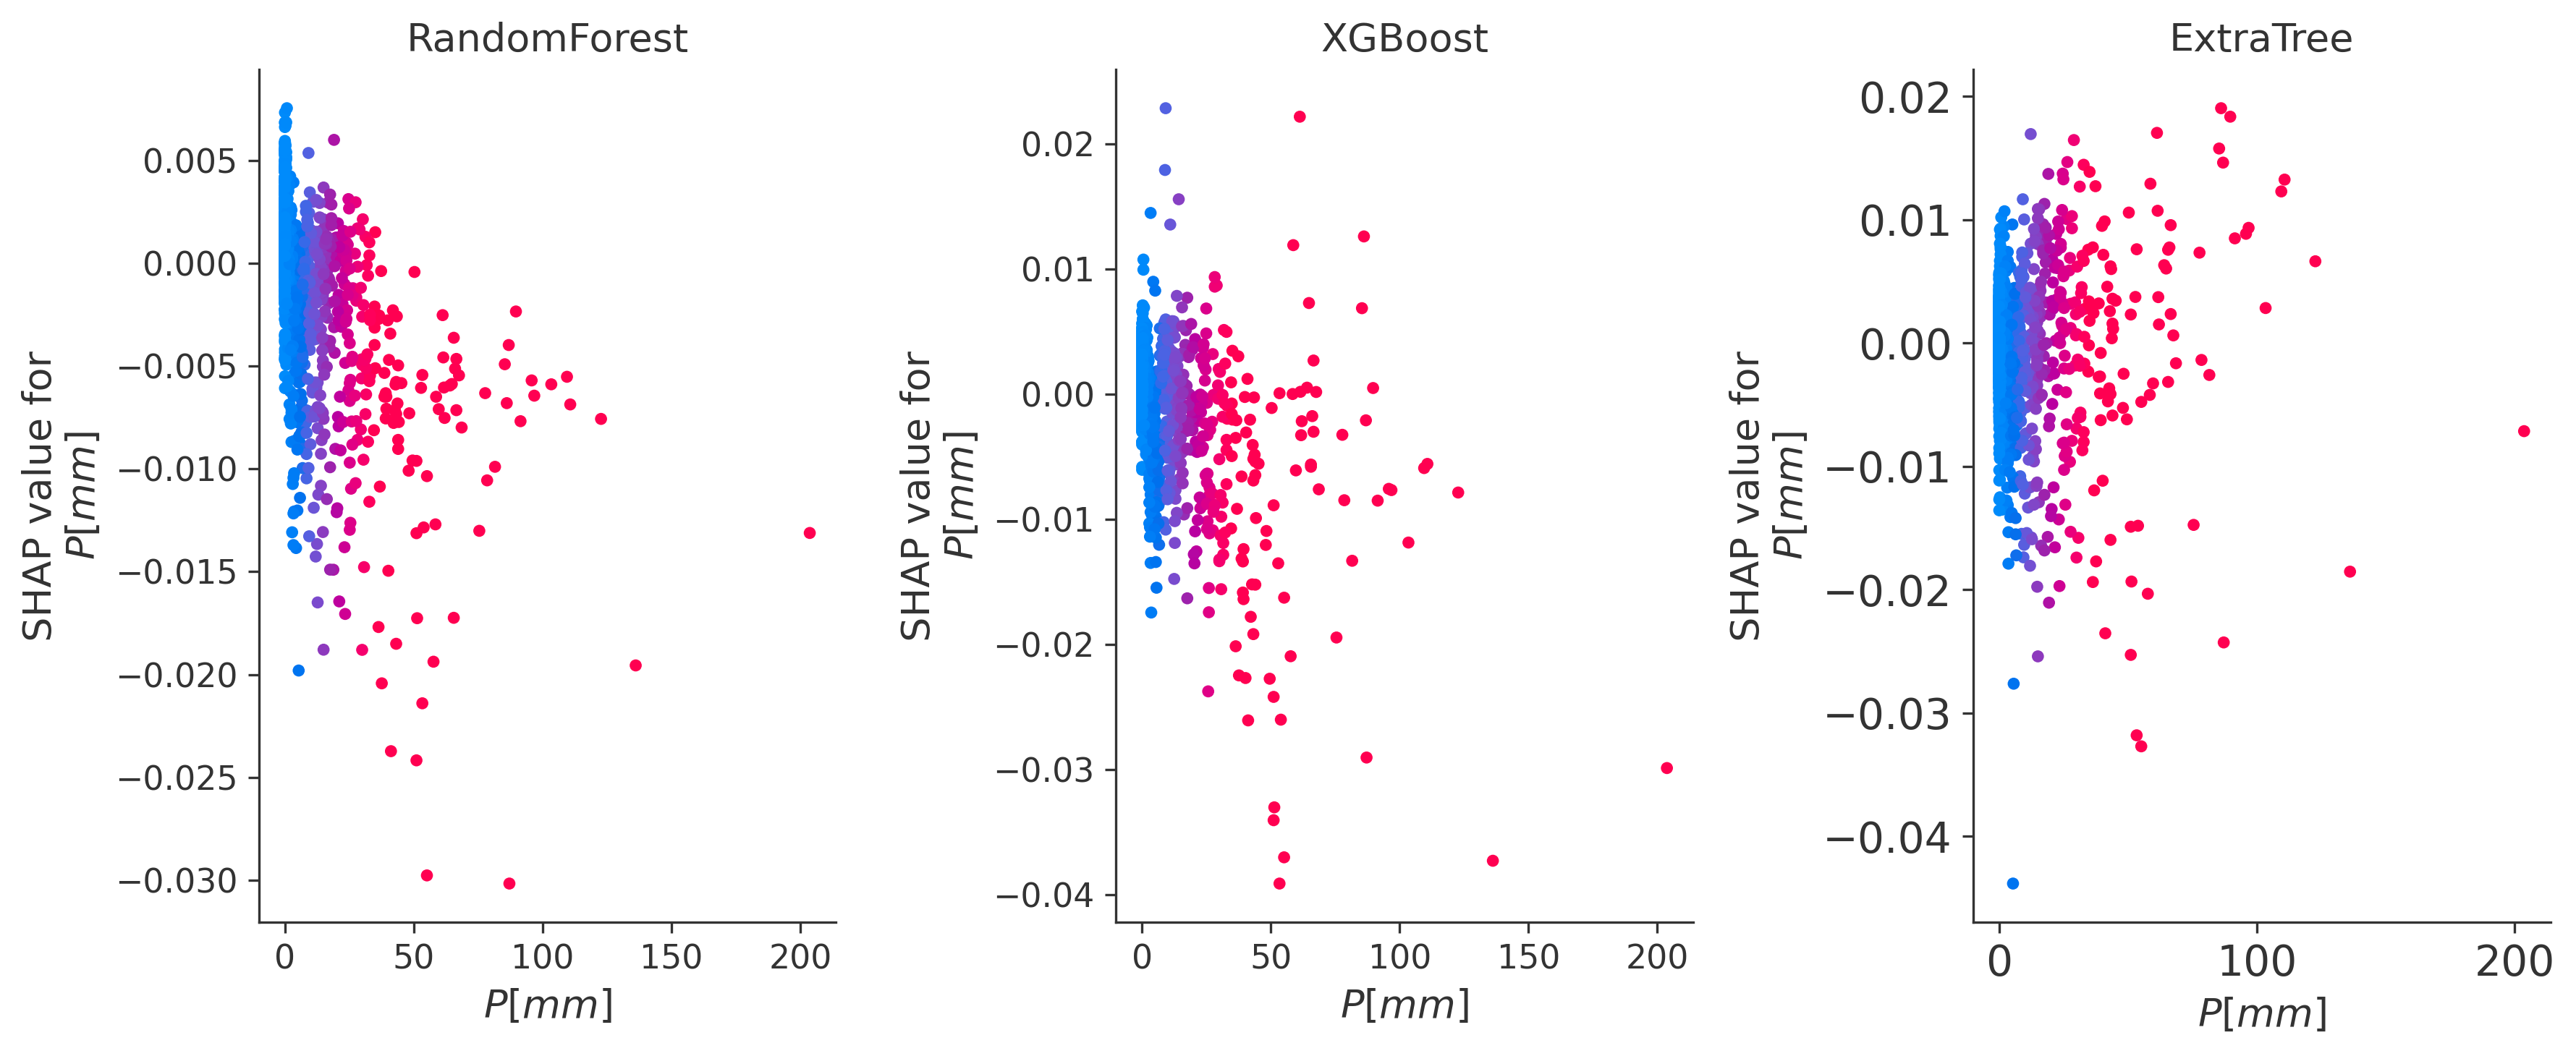

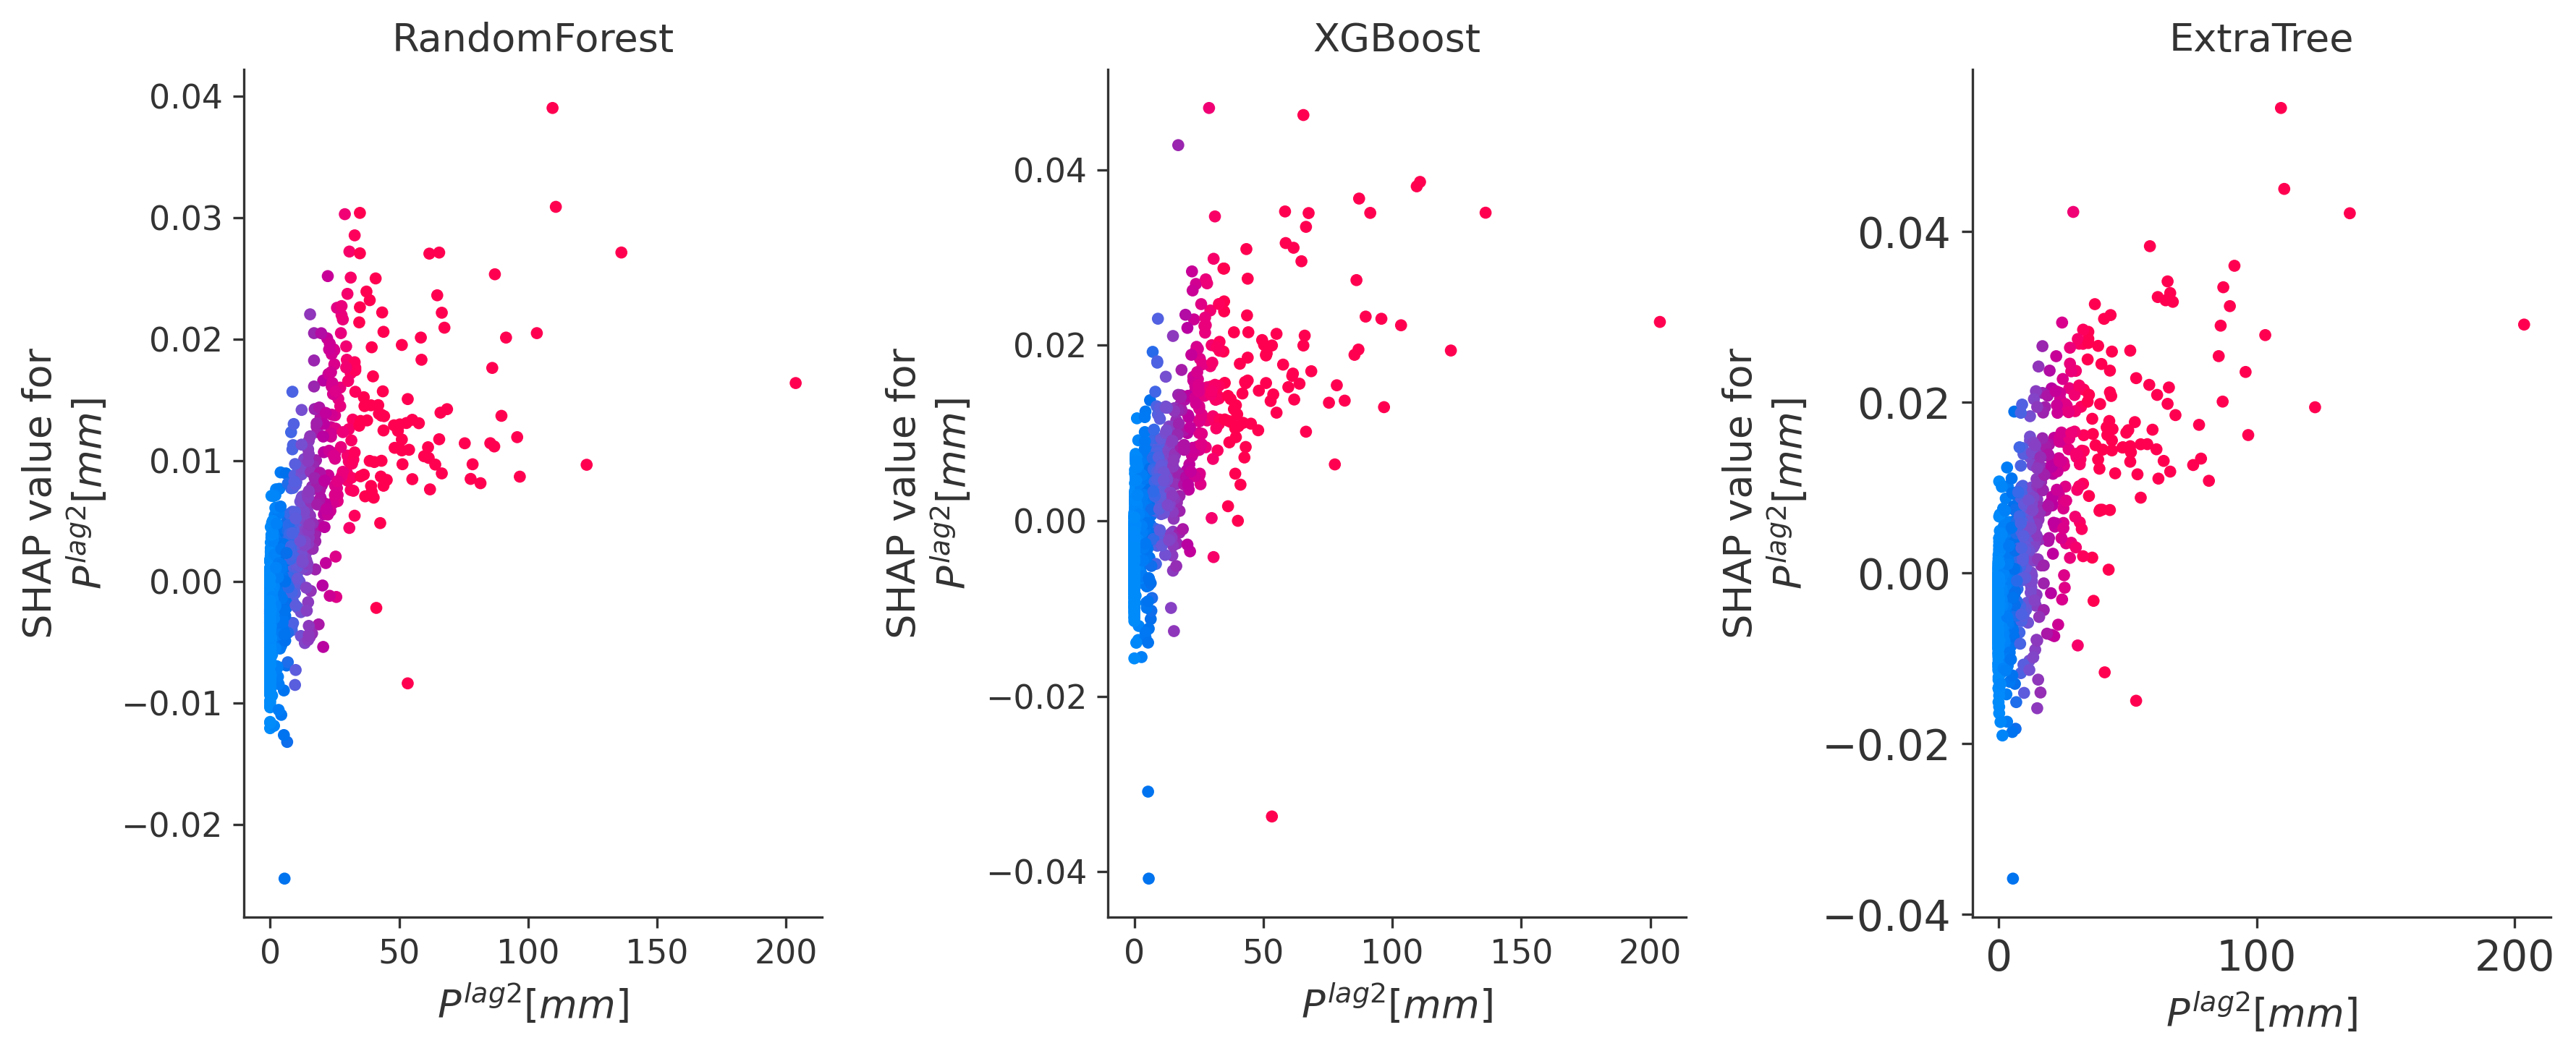

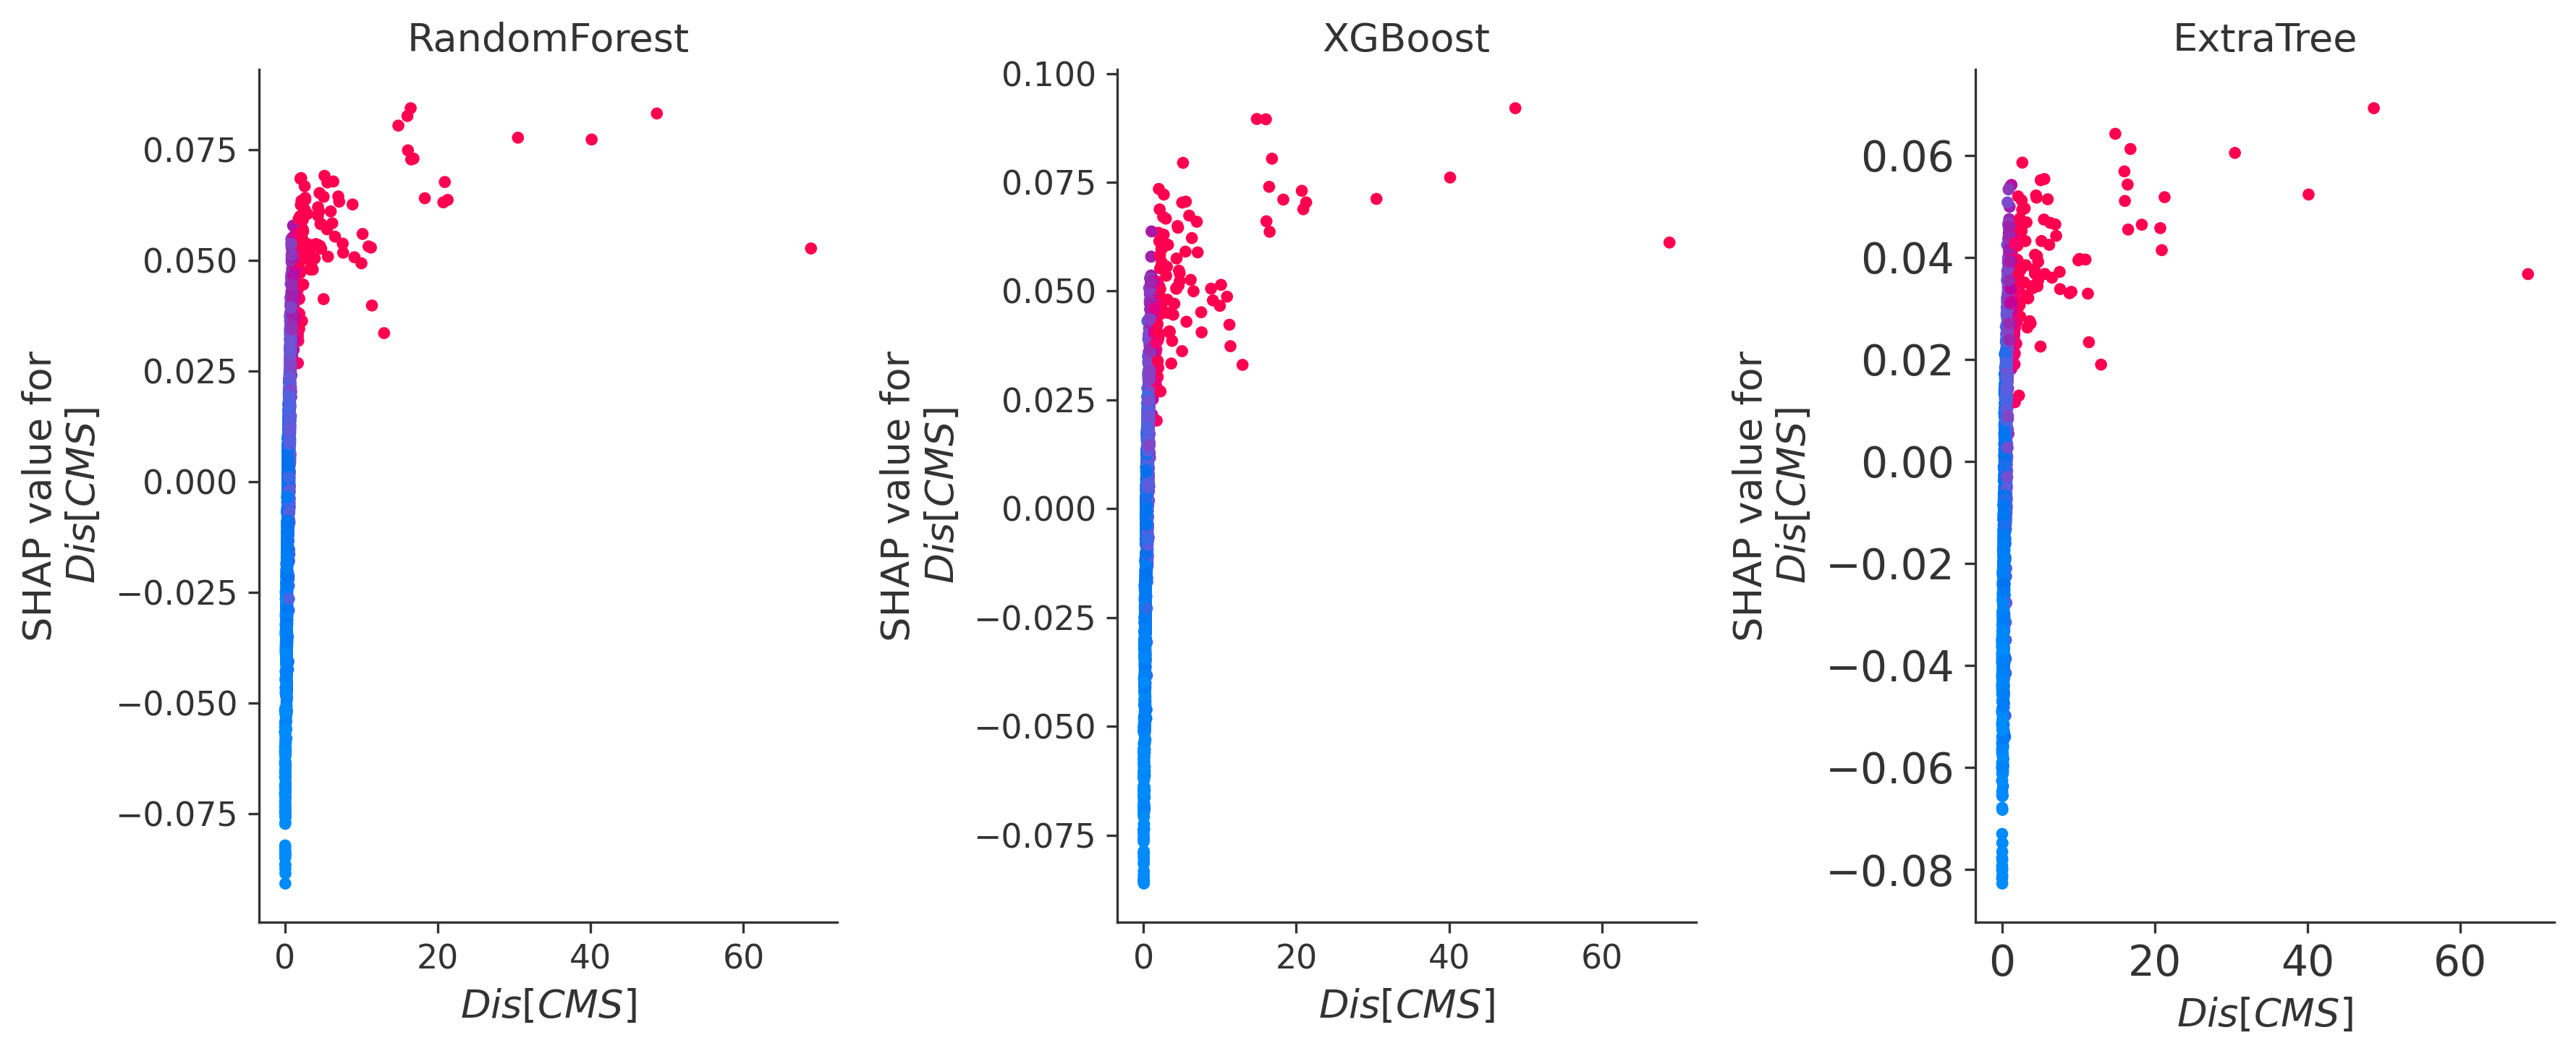

In [43]:
for i in Features:
    fig, ax = plt.subplots(1, 3, figsize=(12, 5), dpi=300)
    for count, j in enumerate(keep):
        shap.dependence_plot(i, keep[j], X, Features, ax=ax[count], show=False,
                             interaction_index=i, title=j)
        #ax[count].title(j, fontsize=14)
        plt.tick_params(labelsize=14)
        # plt.ylabel(labelsize=16)
        plt.tight_layout(pad=1.2)
        plt.savefig(path_to_save+r'/Feature Interaction_' + str(i)+'.jpg',
                    format='jpeg', dpi=300, bbox_inches='tight')


The above feature dependency plot is to be improved as we get more data. 

## Load the yearly crop yield and SPEI data

In [ ]:
current_directory = os.getcwd()
file_location = r'/Inputs/Lake Creek Crop Yield Data.xlsx'

crop_yield = pd.read_excel(
    current_directory+file_location, engine="openpyxl", sheet_name=None)
crop_yield.keys()


dict_keys(['Lake Wheat Acres Planted', 'Caddo County Wheat Yield'])

In [ ]:
crop_yield = crop_yield['Caddo County Wheat Yield']
crop_yield = crop_yield.set_index('Year',).dropna()
crop_yield = crop_yield.iloc[::-1]
crop_yield 

bu/ac *     t/ha  Caddo Estimated Acres  Caddo Estimated Hectare
Year                                                                  
2005     31.7  2.13341                10651.2              4312.226721
2006     23.6  1.58828                 7929.6              3210.364372
2007     25.0  1.68250                 8400.0              3400.809717
2008     39.0  2.62470                13104.0              5305.263158
2009     16.0  1.07680                 5376.0              2176.518219
2010     31.5  2.11995                10584.0              4285.020243
2011     20.0  1.34600                 6720.0              2720.647773
2012     38.3  2.57759                12868.8              5210.040486
2013     34.8  2.34204                11692.8              4733.927126
2014     23.8  1.60174                 7996.8              3237.570850
2015     27.9  1.87767                 9374.4              3795.303644
2016     35.3  2.37569                11860.8              4801.943320
2017     29.9  2.01227                10046.4              4067.368421
2018     32.8  2.20744                11020.8              4461.862348
2019     40.0  2.69200                13440.0              5441.295547
2020     42.8  2.88044                14380.8              5822.186235

In [ ]:
current_directory = os.getcwd()
file_location = r'/Inputs/caddo_SPEI.xlsx'

spei = pd.read_excel(
    current_directory+file_location, engine="openpyxl", sheet_name="spei12")

spei_yearly = spei.sort_values(by = 'Years').set_index("Years")
spei_yearly["SPEI_Avg"] = spei_yearly.median(axis=1)

spei_yearly

January  February     March     April       May      June      July  \
Years                                                                         
2005   0.692891  0.658830  0.626736  0.623681  0.386359  0.185556 -0.754535   
2006  -1.189809 -0.743368 -0.715544 -0.898656 -1.287888 -1.635249 -1.519577   
2007  -1.000719 -1.382129 -1.272528 -0.858911 -0.372118 -0.032010  0.077754   
2008   0.319644  0.276725  0.311596  0.260692 -0.099689 -0.784707 -1.026468   
2009  -0.962900 -1.028821 -1.039983 -1.196946 -0.933294 -1.163769 -1.099613   
2010  -0.518602 -0.280066 -0.234259 -0.191034 -0.470581 -0.683458 -0.423537   
2011   0.507130  0.357049  0.320285  0.207243  0.243664 -0.127219 -0.822131   
2012  -0.529808 -0.490832 -0.436625 -0.204984 -0.260985 -0.050872  1.017498   
2013   1.358892  1.357672  1.359228  1.401475  1.443698  1.529206  0.911806   
2014  -0.438112 -0.437463 -0.353085 -0.522718 -0.640600 -0.726405 -0.694243   
2015  -0.346815 -0.392025 -0.400786 -0.237056  0.244486  0.092622 -0.154837   
2016  -0.183112 -0.280313 -0.290039 -0.324410 -0.922419  0.344178  1.134106   
2017   1.855559  1.859770  1.836118  1.837537  1.837246  1.684725  1.455869   
2018   0.364469  0.396648  0.393494  0.366928  0.301151  0.163160  0.665139   
2019   1.450995  1.447438  1.478213  1.516896  1.634343  1.754414  1.838445   
2020   1.564285  1.543043  1.527136  1.519278  1.484406  1.519161  0.898944   

         August  September   October  November  December  SPEI_Avg  
Years                                                               
2005  -0.752786  -0.646098 -0.745894 -1.045667 -0.969127 -0.230271  
2006  -1.558175  -1.486743 -1.408062 -1.386774 -1.335303 -1.361039  
2007   0.183817   0.277200  0.255452  0.279254  0.353062  0.022872  
2008  -1.032757  -0.944029 -0.935555 -0.980360 -1.005906 -0.860131  
2009  -1.171727  -0.981808 -0.776066 -0.769442 -0.644756 -1.005315  
2010   0.534147   0.543563  0.405034  0.480806  0.504638 -0.212647  
2011  -1.120246  -1.170623 -1.086493 -0.679472 -0.544386 -0.335802  
2012   1.122330   1.461492  1.455568  1.333444  1.356779  0.483313  
2013  -0.116280  -1.053393 -1.024995 -0.913452 -0.808401  1.134739  
2014  -0.619805  -0.435504 -0.520823 -0.468925 -0.166474 -0.494874  
2015  -0.274014  -0.164746 -0.063934 -0.028770 -0.226820 -0.195783  
2016   1.600800   1.769062  1.738976  1.810354  1.842676  0.739142  
2017   0.872419   0.622366  0.688829  0.476839  0.536120  1.570297  
2018   1.158093   1.317079  1.360053  1.395971  1.448067  0.530893  
2019   1.772651   1.597674  1.557198  1.576223  1.594557  1.585390  
2020   0.769669   0.305420  0.305170  0.305529  0.402229  1.191675

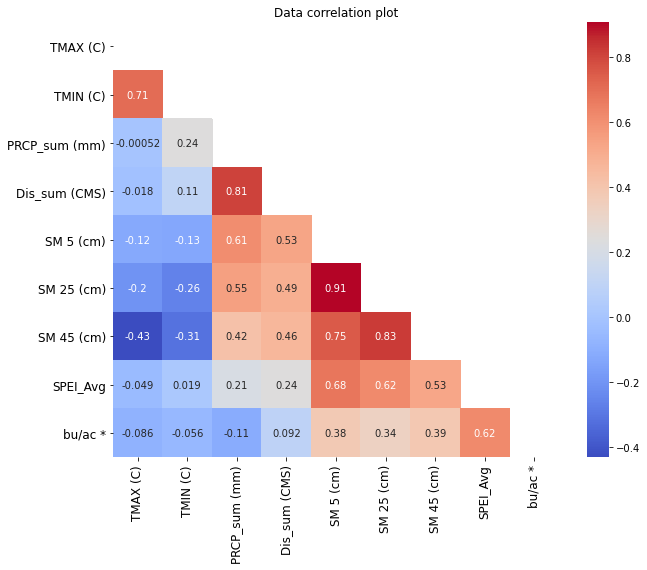

In [ ]:
# Resample the temperature
resampled_yearly = df_F106[['TMAX (C)', "TMIN (C)"]].resample('Y').median()
# Resample the Precipitation & Discharge sum
resampled_yearly["PRCP_sum (mm)"] = df_F106["PRCP (mm)"].resample('Y').sum()
resampled_yearly["Dis_sum (CMS)"] = df_F106["CMS"].resample('Y').sum()
# Resample the SM
resampled_SM_yearly = df_F106.iloc[:, 4:].resample('Y').median()
# The transformed precipitation mean and median

df_F106_resampled_yearly = resampled_yearly.merge(resampled_SM_yearly, on='Date', how="inner")

df_F106_resampled_yearly['SPEI_Avg'] = spei_yearly["SPEI_Avg"].values



df_F106_resampled_yearly['bu/ac *'] = crop_yield['bu/ac *'].values
#df_F106_resampled_yearly['t/ha'] = crop_yield['t/ha'].values

corr_plot(df_F106_resampled_yearly, 'Data correlation plot')


In [ ]:
df_F106_resampled_yearly

TMAX (C)   TMIN (C)  PRCP_sum (mm)  Dis_sum (CMS)  SM 5 (cm)  \
Date                                                                        
2005-12-31  21.233121   7.711034         194.05      21.525829      0.090   
2006-12-31  24.238647  10.622116         496.03      35.552724      0.090   
2007-12-31  23.127547  11.038778        1113.27     228.248556      0.180   
2008-12-31  23.149769   8.486026         757.88     176.531155      0.170   
2009-12-31  21.888670   8.938800         858.68     108.507577      0.180   
2010-12-31  23.021992   9.677681         543.49      67.462672      0.160   
2011-12-31  24.188647   9.588793         463.75      39.228045      0.120   
2012-12-31  24.138648  11.963769         468.09      28.709218      0.110   
2013-12-31  21.688672   8.522137         715.98      58.198950      0.170   
2014-12-31  23.038659   8.949910         607.53      43.733122      0.170   
2015-12-31  22.671996  10.238786        1133.57     126.069425      0.230   
2016-12-31  23.988649  10.516561         764.45      75.305168      0.240   
2017-12-31  24.271980   9.822124         936.46     176.690767      0.270   
2018-12-31  22.449776   8.438804         744.44      65.026608      0.290   
2019-12-31  22.177556   9.277685         918.58     200.172409      0.320   
2020-12-31  22.858105   9.163797         511.48      68.872012      0.255   

            SM 25 (cm)  SM 45 (cm)  SPEI_Avg  bu/ac *  
Date                                                   
2005-12-31        0.24        0.20 -0.230271     31.7  
2006-12-31        0.18        0.13 -1.361039     23.6  
2007-12-31        0.26        0.20  0.022872     25.0  
2008-12-31        0.26        0.21 -0.860131     39.0  
2009-12-31        0.26        0.23 -1.005315     16.0  
2010-12-31        0.25        0.20 -0.212647     31.5  
2011-12-31        0.23        0.17 -0.335802     20.0  
2012-12-31        0.20        0.19  0.483313     38.3  
2013-12-31        0.25        0.19  1.134739     34.8  
2014-12-31        0.25        0.18 -0.494874     23.8  
2015-12-31        0.29        0.21 -0.195783     27.9  
2016-12-31        0.31        0.21  0.739142     35.3  
2017-12-31        0.31        0.22  1.570297     29.9  
2018-12-31        0.30        0.23  0.530893     32.8  
2019-12-31        0.30        0.23  1.585390     40.0  
2020-12-31        0.30        0.23  1.191675     42.8